In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

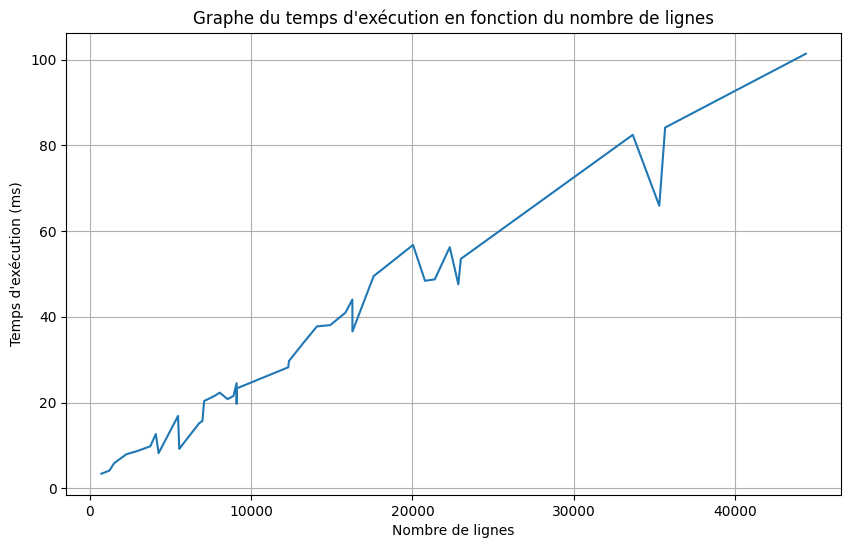

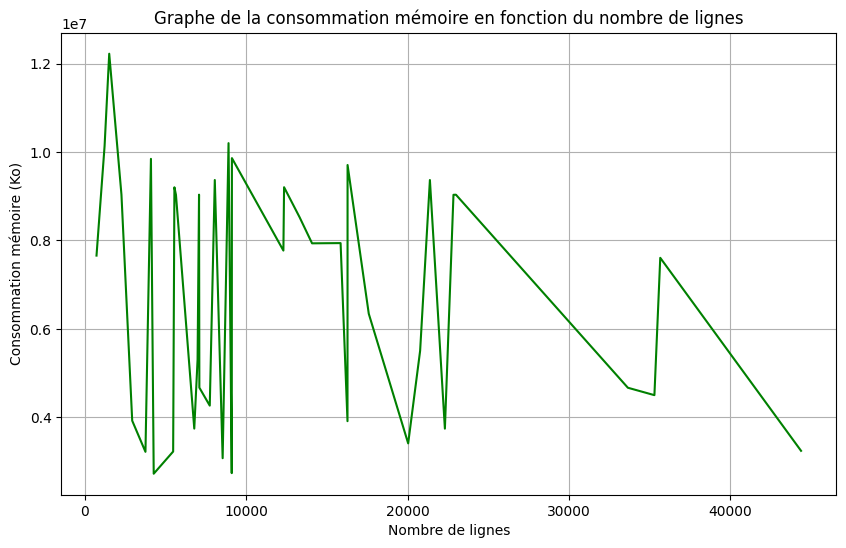

In [18]:
# Charger les données
data_automaton = pd.read_csv("./automaton/automaton_results.csv")

# Convertir les temps en ms
data_automaton['Temps d\'exécution'] = data_automaton['Temps d\'exécution'] / 1000

# Trier les données par ordre croissant selon le 'Nombre de lignes'
data_automaton = data_automaton.sort_values(by='Nombre de lignes', ascending=True)

# Graphique 1 : Temps d'exécution en fonction du nombre de lignes
plt.figure(figsize=(10, 6))
plt.plot(data_automaton['Nombre de lignes'], data_automaton['Temps d\'exécution'])
plt.xlabel('Nombre de lignes')
plt.ylabel('Temps d\'exécution (ms)')
plt.title('Graphe du temps d\'exécution en fonction du nombre de lignes')
plt.grid(True)
plt.savefig("./graphes/temps_execution_automaton.jpg")
plt.show()

# Graphique 2 : Consommation mémoire en fonction du nombre de lignes
plt.figure(figsize=(10, 6))
plt.plot(data_automaton['Nombre de lignes'], data_automaton['Consommation mémoire'], color='green')
plt.xlabel('Nombre de lignes')
plt.ylabel('Consommation mémoire (Ko)')
plt.title('Graphe de la consommation mémoire en fonction du nombre de lignes')
plt.grid(True)
plt.savefig("./graphes/conso_memoire_automaton.jpg")
plt.show()

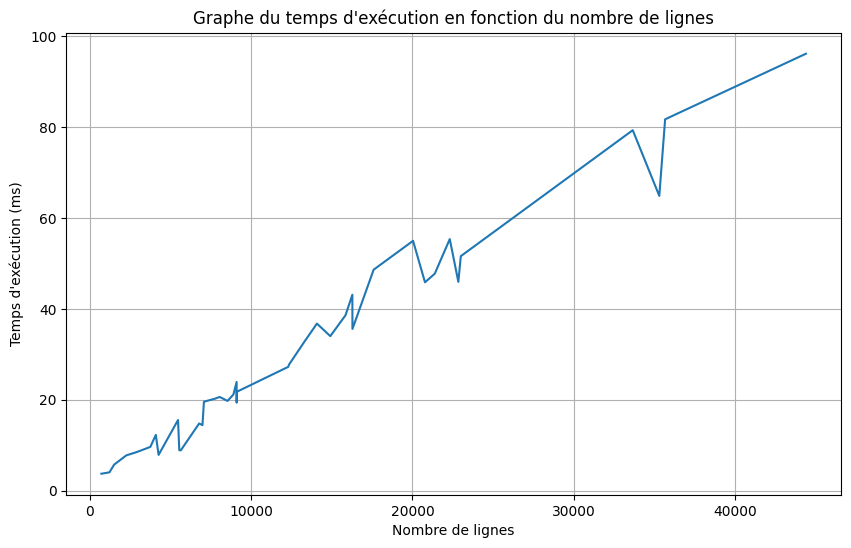

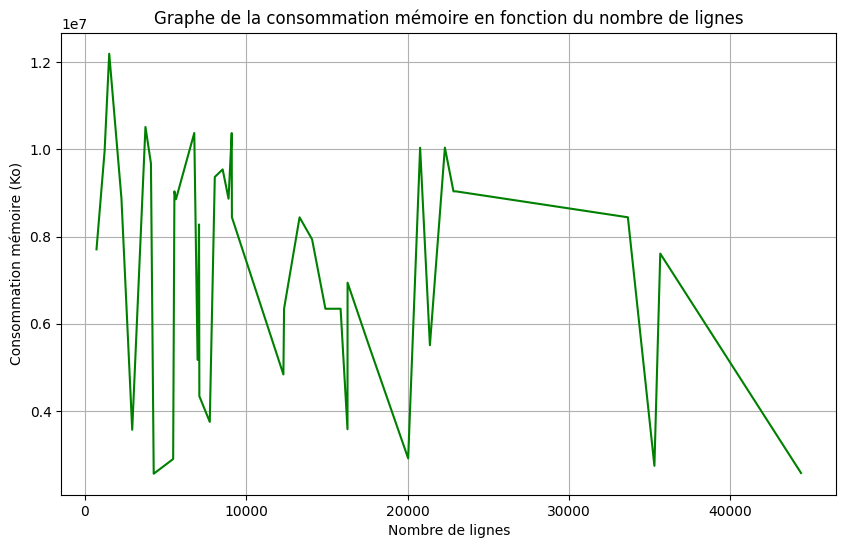

In [19]:
# Charger les données
data_kmp = pd.read_csv("./kmp/kmp_results.csv")

# Convertir les temps en ms
data_kmp['Temps d\'exécution'] = data_kmp['Temps d\'exécution'] / 1000

# Trier les données par ordre croissant selon le 'Nombre de lignes'
data_kmp = data_kmp.sort_values(by='Nombre de lignes', ascending=True)

# Graphique 1 : Temps d'exécution en fonction du nombre de lignes
plt.figure(figsize=(10, 6))
plt.plot(data_kmp['Nombre de lignes'], data_kmp['Temps d\'exécution'])
plt.xlabel('Nombre de lignes')
plt.ylabel('Temps d\'exécution (ms)')
plt.title('Graphe du temps d\'exécution en fonction du nombre de lignes')
plt.grid(True)
plt.savefig("./graphes/temps_execution_kmp.jpg")
plt.show()

# Graphique 2 : Consommation mémoire en fonction du nombre de lignes
plt.figure(figsize=(10, 6))
plt.plot(data_kmp['Nombre de lignes'], data_kmp['Consommation mémoire'], color='green')
plt.xlabel('Nombre de lignes')
plt.ylabel('Consommation mémoire (Ko)')
plt.title('Graphe de la consommation mémoire en fonction du nombre de lignes')
plt.grid(True)
plt.savefig("./graphes/conso_memoire_kmp.jpg")
plt.show()

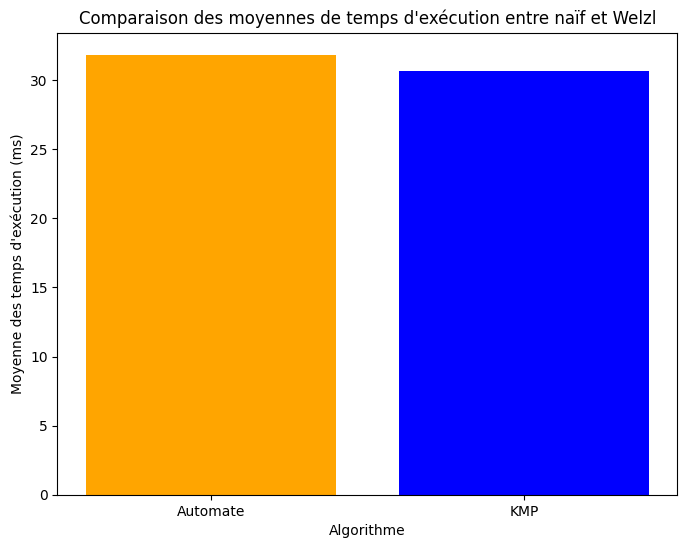

Moyenne des temps d'exécution avec automate : 31.836707317073174 ms
Moyenne des temps d'exécution avec KMP : 30.62656097560976 ms


In [20]:
# Calculer la moyenne des temps d'exécution pour chaque algorithme
moyenne_automaton = data_automaton['Temps d\'exécution'].mean()
moyenne_kmp = data_kmp['Temps d\'exécution'].mean()

# Créer un DataFrame pour les moyennes
moyennes = pd.DataFrame({'Algorithme': ['Automate', 'KMP'],
                            'Moyenne temps d\'exécution': [moyenne_automaton, moyenne_kmp]})

# Créer le diagramme à barres
plt.figure(figsize=(8, 6))
plt.bar(moyennes['Algorithme'], moyennes['Moyenne temps d\'exécution'], color=['orange', 'blue'])
plt.xlabel('Algorithme')
plt.ylabel('Moyenne des temps d\'exécution (ms)')
plt.title('Comparaison des moyennes de temps d\'exécution entre naïf et Welzl')
plt.savefig("./graphes/moyenne_temps.jpg")
plt.show()

print("Moyenne des temps d'exécution avec automate :", moyenne_automaton, "ms")
print("Moyenne des temps d'exécution avec KMP :", moyenne_kmp, "ms")

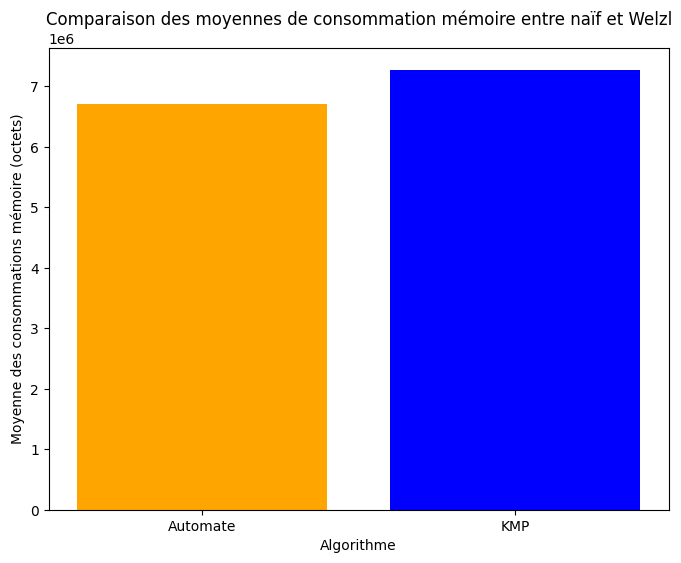

Moyenne des consommations mémoire avec automate : 6714985.219512195 octets
Moyenne des consommations mémoire avec KMP : 7273787.146341464 octets


In [21]:
# Calculer la moyenne de la consommation mémoire pour chaque algorithme
moyenne_memoire_automaton = data_automaton['Consommation mémoire'].mean()
moyenne_memoire_kmp = data_kmp['Consommation mémoire'].mean()

# Créer un DataFrame pour les moyennes de consommation mémoire
moyennes_memoire = pd.DataFrame({'Algorithme': ['Automate', 'KMP'],
                                    'Moyenne consommation mémoire': [moyenne_memoire_automaton, moyenne_memoire_kmp]})

# Créer le diagramme à barres
plt.figure(figsize=(8, 6))
plt.bar(moyennes_memoire['Algorithme'], moyennes_memoire['Moyenne consommation mémoire'], color=['orange', 'blue'])
plt.xlabel('Algorithme')
plt.ylabel('Moyenne des consommations mémoire (octets)')
plt.title('Comparaison des moyennes de consommation mémoire entre naïf et Welzl')
plt.savefig("graphes/moyenne_memoire.jpg")
plt.show()

print("Moyenne des consommations mémoire avec automate :", moyenne_memoire_automaton, "octets")
print("Moyenne des consommations mémoire avec KMP :", moyenne_memoire_kmp, "octets")

In [22]:
# Calculer l'écart type pour chaque mesure
ecart_type_welzl = data['Temps d\'exécution Welzl'].std()
ecart_type_naif = data['Temps d\'exécution naif'].std()
ecart_type_mem_welzl = data['Consommation mémoire Welzl'].std()
ecart_type_mem_naif = data['Consommation mémoire naif'].std()
ecart_type_erreur_rayon = data['Erreur rayon'].std()

# Créer un diagramme à bâtons pour les écarts types
mesures = ['Temps d\'exécution Welzl', 'Temps d\'exécution naif', 'Consommation mémoire Welzl', 'Consommation mémoire naif', 'Erreur rayon']
ecarts_types = [ecart_type_welzl, ecart_type_naif, ecart_type_mem_welzl, ecart_type_mem_naif, ecart_type_erreur_rayon]

plt.bar(mesures, ecarts_types)
plt.xlabel('Mesures')
plt.ylabel('Écart type')
plt.title('Écart type pour chaque mesure')
plt.xticks(rotation=45)
plt.show()

print("Écart type temps d\'exécution Welzl :", ecart_type_welzl)
print("Écart type temps d\'exécution naif :", ecart_type_naif)
print("Écart type consommation mémoire Welzl :", ecart_type_mem_welzl)
print("Écart type consommation mémoire naif :", ecart_type_mem_naif)
print("Écart type erreur rayon :", ecart_type_erreur_rayon)

NameError: name 'data' is not defined